In [46]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import imutils
import matplotlib.pyplot as plt

def crop_img(img):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
   

    return new_img


In [47]:
if __name__ == "__main__":
    training = "Training"
    testing = "Testing"
    training_dir = os.listdir(training)
    testing_dir = os.listdir(testing)
    IMG_SIZE = 256

    for dir in training_dir:
        save_path = 'cleaned/Training/'+ dir
        path = os.path.join(training,dir)
        image_dir = os.listdir(path)
        for img in image_dir:
            image = cv2.imread(os.path.join(path,img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(save_path+'/'+img, new_img)

    for dir in testing_dir:
        save_path = 'cleaned/Testing/'+ dir
        path = os.path.join(testing,dir)
        image_dir = os.listdir(path)
        for img in image_dir:
            image = cv2.imread(os.path.join(path,img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(save_path+'/'+img, new_img)

In [41]:
# image_path = 'Training\1\IMG-20240317-WA0001.jpg'  # Change this to the path of your image
image_path = r'Training\1\IMG-20240317-WA0002.jpg'
original_img = cv2.imread(image_path)
#cropped_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
cropped_img =crop_img(original_img)
cropped_img

array([[[154, 157, 162],
        [154, 157, 162],
        [154, 157, 162],
        ...,
        [168, 168, 174],
        [167, 167, 173],
        [166, 166, 172]],

       [[154, 157, 162],
        [154, 157, 162],
        [154, 157, 162],
        ...,
        [168, 168, 174],
        [167, 167, 173],
        [166, 166, 172]],

       [[154, 157, 162],
        [154, 157, 162],
        [154, 157, 162],
        ...,
        [168, 168, 174],
        [167, 167, 173],
        [166, 166, 172]],

       ...,

       [[141, 142, 146],
        [142, 143, 147],
        [143, 144, 148],
        ...,
        [159, 159, 165],
        [161, 161, 167],
        [162, 162, 168]],

       [[142, 143, 147],
        [143, 144, 148],
        [143, 144, 148],
        ...,
        [160, 160, 166],
        [162, 162, 168],
        [164, 164, 170]],

       [[142, 143, 147],
        [143, 144, 148],
        [144, 145, 149],
        ...,
        [161, 161, 167],
        [163, 163, 169],
        [165, 165, 171]]

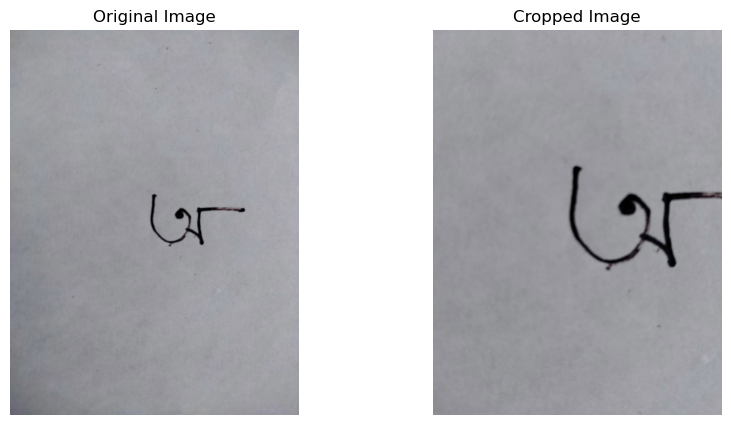

In [42]:
# Display the original and cropped images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Cropped Image')
plt.imshow(cropped_img)
plt.axis('off')

plt.show()

In [43]:
    image_path = r'Training\1\IMG-20240317-WA0001.jpg'
    img = cv2.imread(image_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    

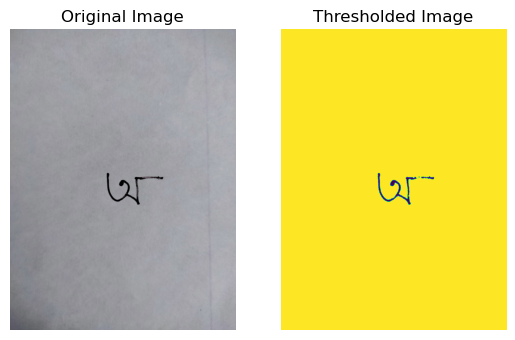

In [44]:
#Plotting after thresholding the image.....
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thresholded Image')
plt.imshow(thresh)
plt.axis('off')

plt.show()

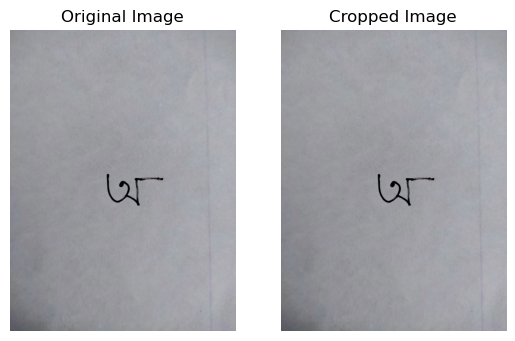

In [45]:
  # find contours in thresholded image, then grab the largest one
# image_path = 'Training\meningioma\Tr-me_0051.jpg'
image_path = r'Training\1\IMG-20240317-WA0001.jpg'
img = cv2.imread(image_path)
    
    
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()


#Plotting after thresholding the image.....
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Cropped Image')
plt.imshow(new_img)
plt.axis('off')

plt.show()